In [1]:
from spineq.optimise import calc_coverage, calc_location_weights, optimise
from spineq.plotting import plot_optimisation_result

import pandas as pd

In [2]:
n_sensors = 20
theta = 500

age_weights = 1
population_weight = 0
workplace_weight = 1

title = "Workplace Network"

In [3]:
result = optimise(n_sensors=n_sensors, theta=theta,
                  age_weights=age_weights,
                  population_weight=population_weight,
                  workplace_weight=workplace_weight)

Fetching data...
Placing sensor 1 out of 20 ... coverage = 0.16
Placing sensor 2 out of 20 ... coverage = 0.23
Placing sensor 3 out of 20 ... coverage = 0.27
Placing sensor 4 out of 20 ... coverage = 0.32
Placing sensor 5 out of 20 ... coverage = 0.36
Placing sensor 6 out of 20 ... coverage = 0.39
Placing sensor 7 out of 20 ... coverage = 0.42
Placing sensor 8 out of 20 ... coverage = 0.45
Placing sensor 9 out of 20 ... coverage = 0.47
Placing sensor 10 out of 20 ... coverage = 0.48
Placing sensor 11 out of 20 ... coverage = 0.50
Placing sensor 12 out of 20 ... coverage = 0.51
Placing sensor 13 out of 20 ... coverage = 0.53
Placing sensor 14 out of 20 ... coverage = 0.54
Placing sensor 15 out of 20 ... coverage = 0.55
Placing sensor 16 out of 20 ... coverage = 0.56
Placing sensor 17 out of 20 ... coverage = 0.57
Placing sensor 18 out of 20 ... coverage = 0.59
Placing sensor 19 out of 20 ... coverage = 0.60
Placing sensor 20 out of 20 ... coverage = 0.61


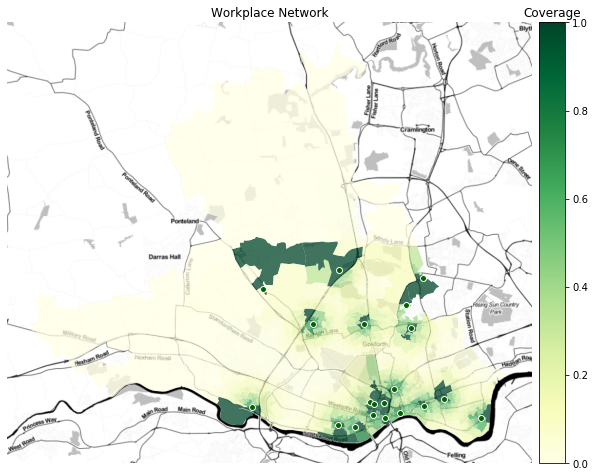

In [4]:
plot_optimisation_result(result, title=title)

In [5]:
oa_weight = calc_location_weights(age_weights=1, population_weight=1, workplace_weight=0)
cov = calc_coverage(result["sensors"], oa_weight, theta=theta)
print("total population coverage: {:.2f}".format(cov["total_coverage"]))

total population coverage: 0.20


In [6]:
oa_weight = calc_location_weights(age_weights=1, population_weight=0, workplace_weight=1)
cov = calc_coverage(result["sensors"], oa_weight, theta=theta)
print("place of work coverage: {:.2f}".format(cov["total_coverage"]))

place of work coverage: 0.61


In [7]:
age_weights = pd.Series(0, index=range(91))
age_weights[age_weights.index <= 16] = 1
population_weight = 1
workplace_weight = 0

oa_weight = calc_location_weights(age_weights=age_weights,
                            population_weight=population_weight,
                            workplace_weight=workplace_weight)
cov = calc_coverage(result["sensors"], oa_weight, theta=theta)
print("children <= 16 coverage: {:.2f}".format(cov["total_coverage"]))

children <= 16 coverage: 0.17


In [8]:
age_weights = pd.Series(0, index=range(91))
age_weights[age_weights.index >= 65] = 1
population_weight = 1
workplace_weight = 0

oa_weight = calc_location_weights(age_weights=age_weights,
                            population_weight=population_weight,
                            workplace_weight=workplace_weight)
cov = calc_coverage(result["sensors"], oa_weight, theta=theta)
print("adults >= 65 coverage: {:.2f}".format(cov["total_coverage"]))

adults >= 65 coverage: 0.15


In [9]:
oa_weight

E00042042    0.000930
E00042043    0.001082
E00042044    0.001146
E00042045    0.000779
E00042046    0.000735
               ...   
E00175601    0.000476
E00175602    0.000108
E00175603    0.000281
E00175604    0.000411
E00175605    0.000930
Name: total, Length: 952, dtype: float64